# <font color='#3a33b3'> River Flow-RF1


    
    
<hr>
    
There are 64 features and eight regression targets.
    
    
**Goal :**
    
regression between 64 features and 8 targets    
    
<hr> 
    
Everything required for this exercise is available at : 
    
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series3" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "https://drive.google.com/drive/folders/1l3P_yFAoYrip1KmuajKSa5a_eymcd-tJ?usp=sharing" > Q-ML-series3 google drive </a>
    

# <font color='#3a33b3'>  Import libraries
    
<hr>
    
Just as the title says. Import the necessary libraries.

In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# <font color='#3a33b3'>  Import data
<hr>
    

Using pandas to read the data. Data is availabe from the sourse website (Kaggle). You can download the data from this link :
<a href = "https://www.kaggle.com/datasets/samanemami/river-flowrf1">River Flow-RF1
</a>
    


In [24]:
path = '../Data/'
dataset = pd.read_csv(path+'rf1.csv')

## <font color='#3a33b3'>   data information
    
Information about column data types and the shape of the dataset.
    
There are 9125 samples with 73 columns of dependant and independent variables.

As mentioned before, 64 are features and 8 are targets.
    
You can check top 5 samples of the dataset

In [25]:
print(dataset.dtypes)
print("shape of the dataset is : ",dataset.shape)

Unnamed: 0        int64
CHSI2__0        float64
NASI2__0        float64
EADM7__0        float64
SCLM7__0        float64
                 ...   
SCLM7_48H__0    float64
CLKM7_48H__0    float64
VALI2_48H__0    float64
NAPM7_48H__0    float64
DLDI4_48H__0    float64
Length: 73, dtype: object
shape of the dataset is :  (9125, 73)


In [26]:
dataset.head()

,Unnamed: 0,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,0,288.0,3.41,276.0,194.0,63.8,8.78,166.0,59.5,NaN,...,NaN,NaN,269.0,3.33,257.0,186.0,61.2,8.07,157.0,55.1
1,1,287.0,3.40,275.0,194.0,64.1,8.81,165.0,59.4,NaN,...,NaN,NaN,269.0,3.32,257.0,185.0,61.1,8.04,157.0,55.2
2,2,288.0,3.39,274.0,193.0,63.4,8.88,165.0,59.4,NaN,...,NaN,NaN,268.0,3.32,257.0,186.0,61.3,8.14,156.0,55.2
3,3,287.0,3.39,273.0,193.0,64.0,8.70,164.0,57.9,NaN,...,NaN,NaN,268.0,3.33,257.0,185.0,61.2,8.21,156.0,55.9
4,4,287.0,3.34,273.0,193.0,64.0,8.78,165.0,57.9,NaN,...,NaN,NaN,266.0,3.31,257.0,185.0,61.4,8.04,156.0,55.9


## <font color='#3a33b3'>   few useless columns and new dataframes

    
As you can see, A column ,unnamed, is extra Which means we can drop it from the dataframe

In [27]:
task = dataset.drop(columns = ['Unnamed: 0'])

In [28]:
task.describe()

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,NASI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
count,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9113.000000,9113.000000,...,9005.000000,9005.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000
mean,163.780449,3.487952,160.311529,78.312581,66.115901,12.419788,60.787189,46.652449,163.860726,3.488075,...,61.005031,46.889994,162.733578,3.487945,159.399288,77.553534,65.916548,12.420030,60.169074,46.493874
std,61.810613,0.894649,56.426769,34.224763,31.937082,6.915262,23.672154,22.271818,61.799580,0.895197,...,23.753508,22.319946,61.599161,0.894764,56.167759,33.358976,32.074691,6.930827,22.565201,22.318318
min,68.300000,1.500000,83.300000,43.800000,18.900000,1.580000,37.200000,19.400000,68.300000,1.500000,...,37.200000,19.400000,68.100000,1.500000,83.300000,43.800000,18.900000,1.580000,37.200000,19.400000
25%,123.000000,3.260000,121.000000,54.900000,43.200000,7.060000,44.600000,31.800000,123.000000,3.260000,...,44.600000,32.000000,122.000000,3.260000,120.000000,54.400000,43.000000,6.990000,44.600000,31.700000
50%,153.000000,3.300000,150.000000,67.400000,54.100000,11.500000,57.700000,35.500000,153.000000,3.300000,...,57.700000,35.600000,152.000000,3.300000,149.000000,67.100000,53.900000,11.500000,57.100000,35.500000
75%,190.000000,3.540000,190.000000,87.100000,88.400000,15.500000,62.600000,57.900000,190.000000,3.540000,...,62.600000,58.200000,189.000000,3.540000,189.000000,86.400000,88.400000,15.500000,62.600000,57.900000
max,350.000000,78.900000,323.000000,194.000000,174.000000,33.400000,166.000000,108.000000,350.000000,78.900000,...,166.000000,108.000000,350.000000,78.900000,323.000000,187.000000,174.000000,33.400000,157.000000,108.000000


## <font color='#3a33b3'>   Missing Values
    
As you can see, There are many records that have missing values or NaN. There are many approaches when face with missing values, however in this exercise we are going to complety ignore them and drop these records as well

In [29]:
print(sum(task.isnull().sum(axis=1).values >= 1)," many records have missing values\n#######")
print(task.isnull().sum(axis=1))

120  many records have missing values
#######
0       56
1       56
2       56
3       56
4       56
        ..
9120     0
9121     0
9122     0
9123     0
9124     0
Length: 9125, dtype: int64


In [30]:
# Drop all records with Missing Values 

task = task.dropna()

In [31]:
print(sum(task.isnull().sum(axis=1).values >= 1)," many records have missing values\n#######")
print(task.isnull().sum(axis=1))

0  many records have missing values
#######
60      0
61      0
62      0
63      0
64      0
       ..
9120    0
9121    0
9122    0
9123    0
9124    0
Length: 9005, dtype: int64


## <font color='#3a33b3'>   train and test split
    
Split a portion of data so that it can be used as test to evaluate our model. 

In [32]:
task_x = (task.iloc[:, 0:64])
task_y = (task.iloc[:, 64:])
task_x_train, task_x_test, task_y_train, task_y_test = train_test_split(task_x, task_y, test_size= 0.25)

# <font color='#3a33b3'>   Model
 
<hr>
    
    
Data is ready to be used by our model, so before that we need to create multiple models so that each model will train on the training data and evaluated on the test data.
    
    
We choose a linear regression and polynomial regression for test tasks. degree of polynomial regressions are 1,2 . Overall 2 linear regression models  for this task.
        
    
As well as linear and polynomial regression we are going to use XGBoost to model our data and evaluate it as well.
    
- XGBoost
    
This is going to take a while to run  (probably) ....

In [33]:
# This might take some time . ....

task_models = {}


M = [1, 2]
polynomials = {}
for _degree in M:
    polynomials[_degree] = PolynomialFeatures(degree = _degree, include_bias = True)

    
# Linear Regression models 

for _degree in M:
        model = LinearRegression()
        
        x_train = task_x_train.values
        x_train = polynomials[_degree].fit_transform(x_train)
        y_train = task_y_train.values
        
        model.fit(x_train,y_train)
        
        task_models[_degree] = model
        
# XGBOOST


xgb= XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(task_x_train,task_y_train)
task_models['XGBoost'] = xgb

## <font color='#3a33b3'>   Predict
    
Our goal is to use these models to predict the MaxTemp  using MinTemp.

In [34]:
task_predicted = {}

for _degree in M:
    
    task_predicted[_degree] = {
        'train' : task_models[_degree].predict(polynomials[_degree].fit_transform(task_x_train.values)), 
        'test' : task_models[_degree].predict(polynomials[_degree].fit_transform(task_x_test.values))
        }
    
task_predicted['XGBoost'] = {
        'train' : task_models['XGBoost'].predict(task_x_train.values),
        'test' : task_models['XGBoost'].predict(task_x_test.values)   
}

## <font color='#3a33b3'>   RMSE
    
We are going to use RMSE to evaluate our models; Therefore we need to define it :
    
Edit :  It is also possible to use it from sklearn
    
RMSE is a bit different in this case , It is the sum of $||.||_2^2$ of errors.
    
    
$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat y_i - y_i)^2}{n}}$  

In [35]:
def RMSE(Y,Yhat):
    N = len(Y)
    rmse = np.sqrt(np.sum((Y-Yhat)**2)/N)
    return rmse

## <font color='#3a33b3'> Evaluation
    
    
Evaluate our models using RMSE

In [36]:
task_rmse = {}

for _degree in M: 
    task_rmse[_degree]  = {
        'train' : RMSE(task_y_train.values,task_predicted[_degree]['train']),
        'test' : RMSE(task_y_test.values,task_predicted[_degree]['test'])
    }
    
task_rmse['XGBoost'] = {
        'train' : RMSE(task_y_train.values,task_predicted['XGBoost']['train']),
        'test' : RMSE(task_y_test.values,task_predicted['XGBoost']['test'])
}
 

# <font color='#3a33b3'>   Result
 
<hr>
    
You can check the result for each model and choose the best model to predict this multi-target dataset.

    
We will also Visualize our predicted vs actual data on both train and test for our task.

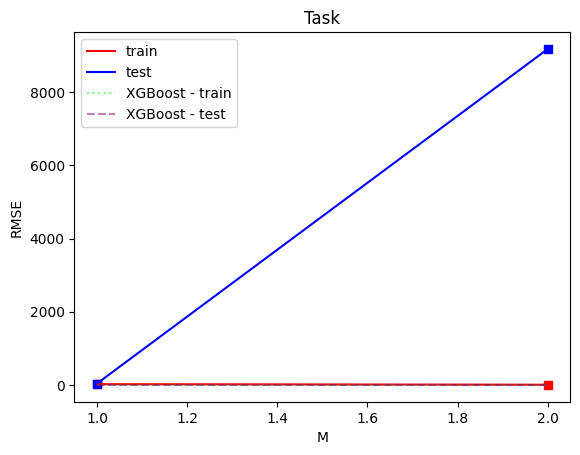

In [37]:
plt.plot(M, [task_rmse[i]['train'] for i in M], color = 'red', label = 'train')
plt.scatter(M, [task_rmse[i]['train'] for i in M], color = 'red', marker= 's')
plt.plot(M, [task_rmse[i]['test'] for i in M], color = 'blue', label = 'test')
plt.scatter(M, [task_rmse[i]['test'] for i in M], color = 'blue', marker= 's')
plt.plot(M, [task_rmse['XGBoost']['train'] for i in M],color = 'lime' 
         , linestyle = 'dotted',label = 'XGBoost - train',alpha = 0.5)
plt.plot(M, [task_rmse['XGBoost']['train'] for i in M],color = 'purple' 
         , linestyle = 'dashed',label = 'XGBoost - test',alpha = 0.5)
plt.xlabel('M')
plt.ylabel('RMSE')
plt.title('Task')
plt.legend(loc = 'best')
plt.show()

## <font color='#3a33b3'>   Linear Models
 
Y and Yhat plot in XY-plane in response to their sample number.

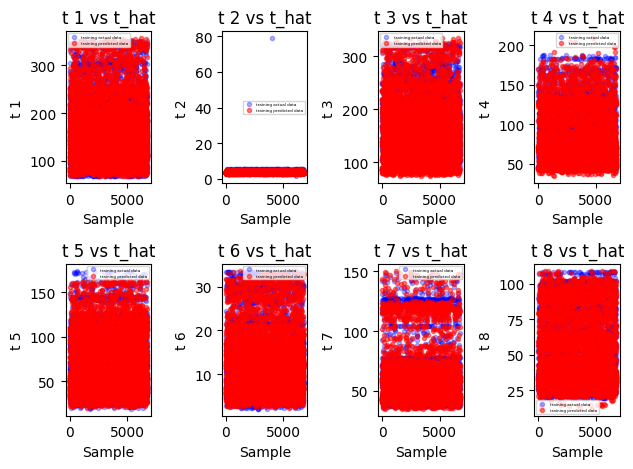

In [38]:
fig, ax = plt.subplots(2,4)


for j in range(0,4):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[1]['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f't {j+1}')
    ax[0][j].set_title(f't {j+1} vs t_hat')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,4):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+4] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[1]['train'][i][j+4] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f't {j+5}')
    ax[1][j].set_title(f't {j+5} vs t_hat')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()

## <font color='#3a33b3'>   Polynomiad degree 2  Model
 
Y and Yhat plot in XY-plane in response to their sample number.

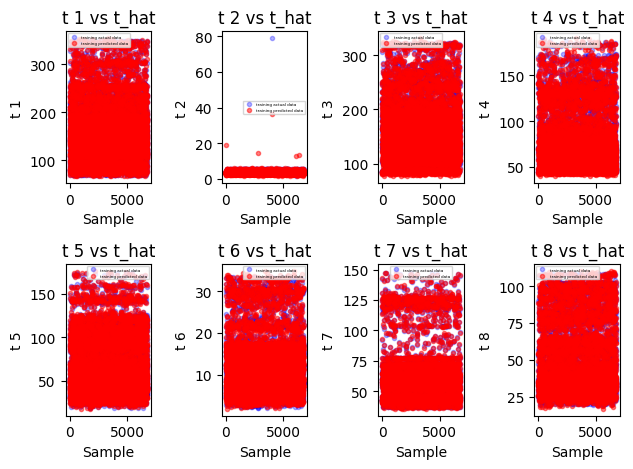

In [39]:
fig, ax = plt.subplots(2,4)


for j in range(0,4):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[2]['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f't {j+1}')
    ax[0][j].set_title(f't {j+1} vs t_hat')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,4):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+4] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[2]['train'][i][j+4] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f't {j+5}')
    ax[1][j].set_title(f't {j+5} vs t_hat')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()

## <font color='#3a33b3'>   XGBoost
 
Y and Yhat plot in XY-plane in response to their sample number.

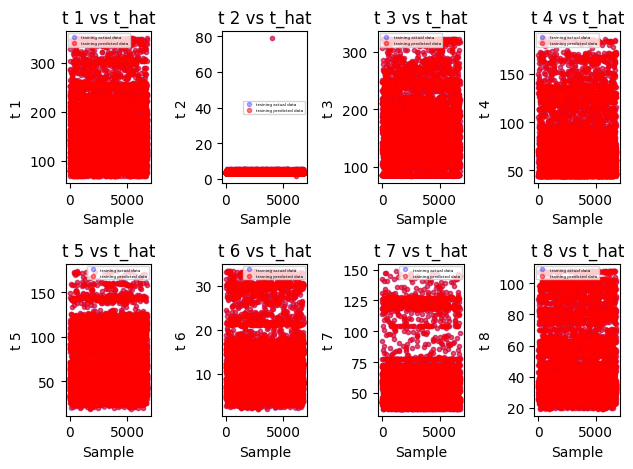

In [40]:
fig, ax = plt.subplots(2,4)


for j in range(0,4):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted['XGBoost']['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f't {j+1}')
    ax[0][j].set_title(f't {j+1} vs t_hat')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,4):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+4] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted['XGBoost']['train'][i][j+4] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f't {j+5}')
    ax[1][j].set_title(f't {j+5} vs t_hat')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()